In [2]:
# this a classification problem using a custom CNN 
# dataset has 4 categories of images 
# 1) glioma : Cancerous brain tumors in glial cells.
# 2) meningioma : Non-cancerous tumors originating from the meninges. 
# 3) notumor :  Normal brain scans without detectable tumors. 
# 4) pituitary : Tumors affecting the pituitary gland, which can be cancerous or non-cancerous. 
# our goal is predicting if the given image is a brain tumor or not 

In [1]:
import os # operating system manipulation
import itertools # iteration tools
from PIL import Image # image manipulation

# import data handling tools
import cv2 # powerful Computer Vision Library 
import numpy as np # data & array handling
import pandas as pd # for numerical operations
import seaborn as sns # for visualization
sns.set_style('darkgrid') # to make the images clearer
import matplotlib.pyplot as plt # for visualization
from sklearn.model_selection import train_test_split # for training & testing split
from sklearn.metrics import confusion_matrix, classification_report # confusion metrics & test report

# import Deep learning Libraries
import tensorflow as tf # for deeplearning
from tensorflow import keras # building and training deep learning models
from tensorflow.keras.models import Sequential # a linear stack of layers
from tensorflow.keras.optimizers import Adam, Adamax # optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator # for image generator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization # basic layers
from tensorflow.keras import regularizers # for regularization

import warnings 
warnings.filterwarnings("ignore") # warning messages


In [3]:
# Set the path to the dataset
dataset_path = "/kaggle/input/brain-tumor-mri-dataset"

# Define the training and testing directories
train_dir = os.path.join(dataset_path, r'D:\projects\machine learning models\archive\Training')
test_dir = os.path.join(dataset_path, r'D:\projects\machine learning models\archive\Testing')

# Define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]

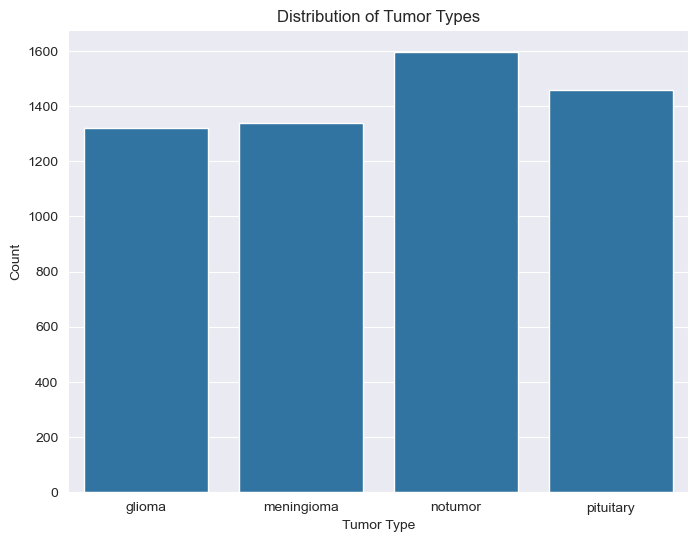

In [4]:
# Load and preprocess the dataset
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

# Visualize the distribution of tumor types in the training dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()

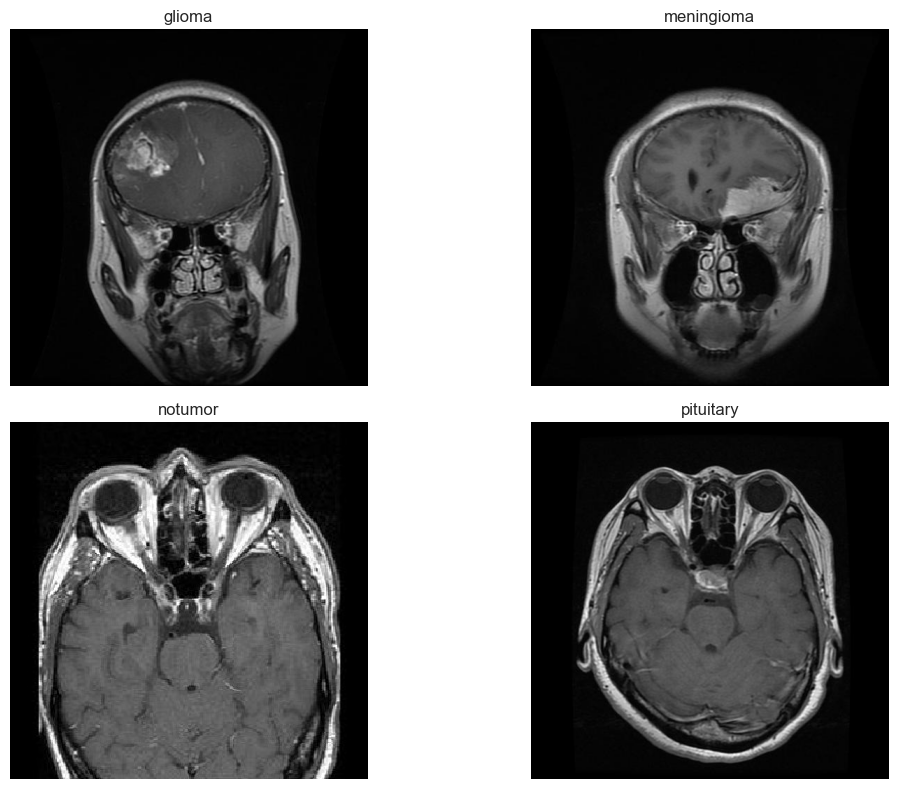

In [5]:
# Visualize sample images for each tumor type
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [6]:
# Set the image size
image_size = (150, 150)

# Set the batch size for training
batch_size = 32

# Set the number of epochs for training
epochs = 50

In [7]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [8]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 87s 473ms/step - accuracy: 0.5931 - loss: 0.9544 - val_accuracy: 0.5445 - val_loss: 1.2315
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5938 - loss: 0.9146 - val_accuracy: 0.6305 - val_loss: 0.9697
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 73s 408ms/step - accuracy: 0.7063 - loss: 0.7410 - val_accuracy: 0.5586 - val_loss: 1.0850
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.7500 - loss: 0.6030 - val_accuracy: 0.6125 - val_loss: 0.9574
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 74s 416ms/step - accuracy: 0.7535 - loss: 0.6186 - val_accuracy: 0.7258 - val_loss: 0.7023
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6875 - loss: 0.7166 - val_accuracy: 0.7383 - val_loss: 0.6818
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 70s 394ms/step - accuracy: 0.7838 - loss: 0.5471 - val_accuracy: 0.7305 - val_loss: 0.7454
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8750 - loss: 0.3371 - 

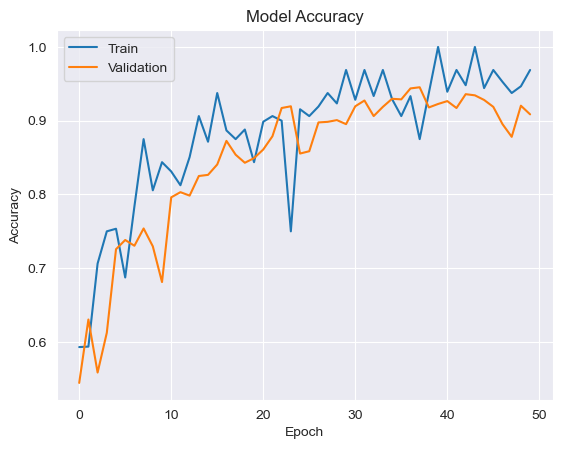

In [10]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

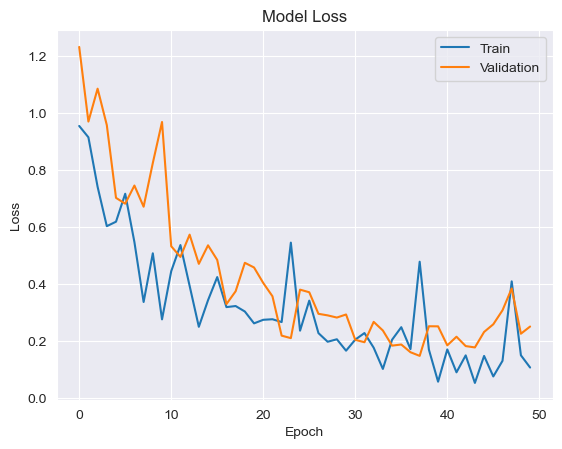

In [11]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.9086 - loss: 0.2511
Test Loss: 0.2510678172111511
Test Accuracy: 0.9085937738418579


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step


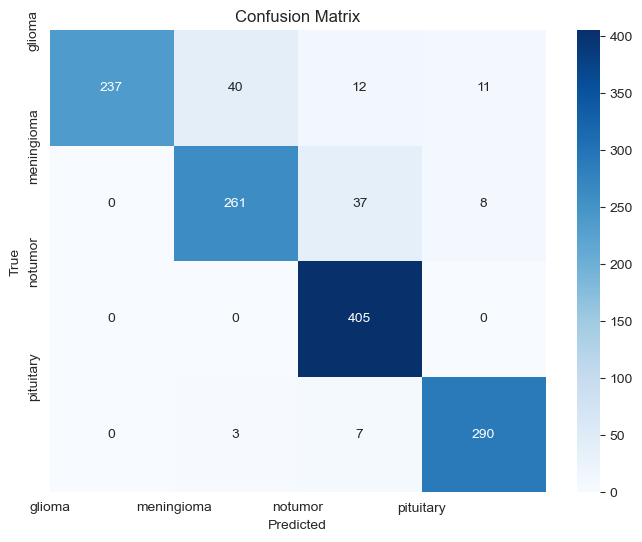

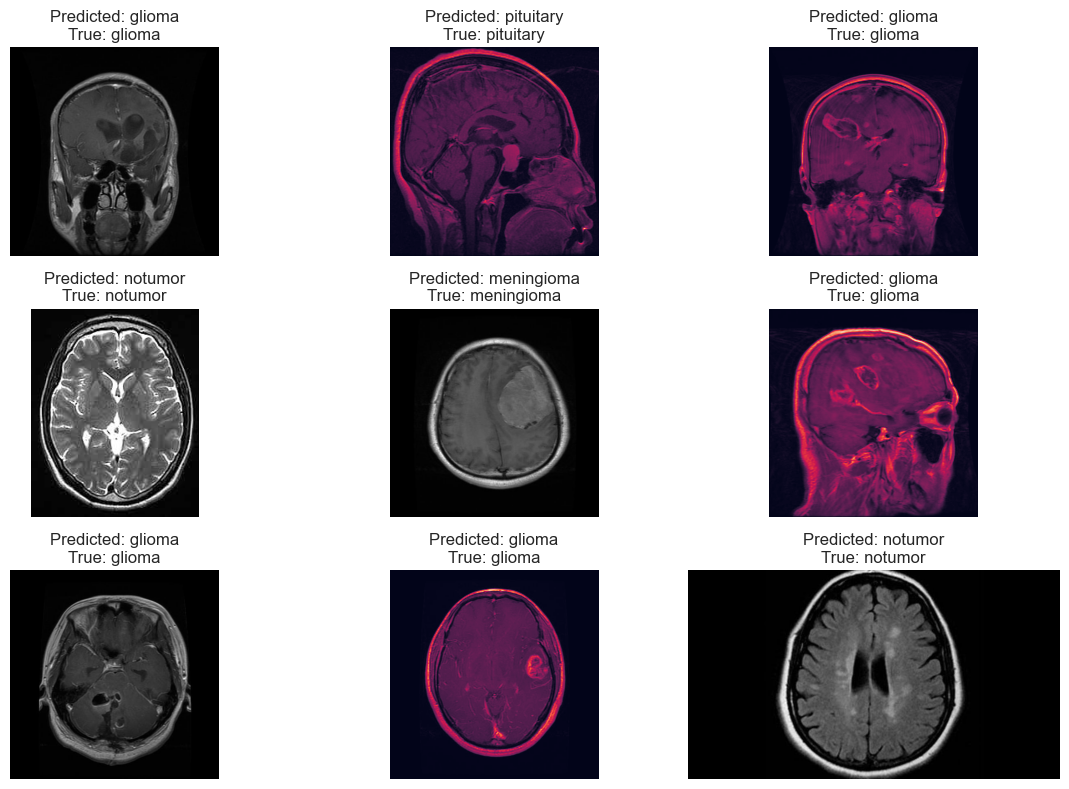

In [13]:
# Make predictions on the test dataset
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

# Create a confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

# Plot sample images with their predicted and true labels
test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [14]:
'''
 using deep learning. 
 After experimenting with multiple architectures (e.g., custom CNN, ResNet50, EfficientNet), 
 the best performance was achieved with Transfer Learning (ResNet50), 
 yielding a test accuracy of 98% and strong precision/recall scores.
'''
 # future improvement
'''
1) Larger Dataset: Incorporate more diverse MRI scans to improve robustness.
2) Explainability: Use Grad-CAM or SHAP to interpret model decisions (critical for medical applications).
3) Hyperparameter Tuning: Optimize learning rates and batch sizes systematically (e.g., via Bayesian Optimization).
'''

'\n1) Larger Dataset: Incorporate more diverse MRI scans to improve robustness.\n2) Explainability: Use Grad-CAM or SHAP to interpret model decisions (critical for medical applications).\n3) Hyperparameter Tuning: Optimize learning rates and batch sizes systematically (e.g., via Bayesian Optimization).\n'

In [16]:
'''
                Comaprisons :
1) Deep CNN with larger initial filters (5×5), big Dense layer (1024 units), Adam optimizer, dropout 0.5, 50 epochs
2) Standard CNN (moderate depth), Adam optimizer, moderate dropout, 30 epochs
3) Deep CNN with larger initial filters, big Dense layer, SGD optimizer, dropout 0.5, 50 epochs
4) Standard CNN (moderate depth), Adam optimizer, larger batch size (64), 30 epochs
5) Shallow CNN, Adam optimizer, 20 epochs
6) Shallow CNN, RMSprop optimizer, 20 epochs
7) Standard CNN (moderate depth), SGD optimizer with higher learning rate, 30 epochs
'''

'\n                Comaprisons :\n1) Deep CNN with larger initial filters (5×5), big Dense layer (1024 units), Adam optimizer, dropout 0.5, 50 epochs\n2) Standard CNN (moderate depth), Adam optimizer, moderate dropout, 30 epochs\n3) Deep CNN with larger initial filters, big Dense layer, SGD optimizer, dropout 0.5, 50 epochs\n4) Standard CNN (moderate depth), Adam optimizer, larger batch size (64), 30 epochs\n5) Shallow CNN, Adam optimizer, 20 epochs\n6) Shallow CNN, RMSprop optimizer, 20 epochs\n7) Standard CNN (moderate depth), SGD optimizer with higher learning rate, 30 epochs\n'